<div style="font-size: 18pt;">Using many trees to improve forecasts</div><br/>
<div style="font-size: 18pt;">- Random forest</div><br/>
<div style="font-size: 18pt;">- Boosting algorithms</div><br/>

In [24]:
#load necessary packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
#check current folder
os.chdir("C:/Users/THINK/Dysk Google/_Priv/Vistula_AML_course_2022/Python")
os.getcwd()

'C:\\Users\\THINK\\Dysk Google\\_Priv\\Vistula_AML_course_2022\\Python'

In [26]:
#load and inspect Adult wages data set
earn = pd.read_csv("data/HW4_earnings_data.csv", sep=';')
earn.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [27]:
#inspect the data
earn.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
earn.shape

(32561, 15)

In [29]:
# create initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable', 'Beam')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable
7,Beam


In [30]:
#generate binary dummies
dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type"] )
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df


,Bridge_Types,Type_Arch,Type_Beam,Type_Cable,Type_Cantilever,Type_Suspension,Type_Tied Arch,Type_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0
7,Beam,0,1,0,0,0,0,0


In [31]:
#remember drop the original text column afterwards
bridge_df.drop(['Bridge_Types'], axis=1, inplace=True)
bridge_df

,Type_Arch,Type_Beam,Type_Cable,Type_Cantilever,Type_Suspension,Type_Tied Arch,Type_Truss
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0
7,0,1,0,0,0,0,0


In [32]:
#perform one-hot encoding for the Adult earnings dataset
earn.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
earn_d = pd.get_dummies(earn, 
                        columns=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"], 
                        prefix=["workclas", "education","marital_status","occupation","relationship","race","sex","native_country"] )

In [34]:
pd.set_option('display.max_columns', None)
earn_d.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclas_ ?,workclas_ Federal-gov,workclas_ Local-gov,workclas_ Never-worked,workclas_ Private,workclas_ Self-emp-inc,workclas_ Self-emp-not-inc,workclas_ State-gov,workclas_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
print(earn_d.columns.tolist())

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income', 'workclas_ ?', 'workclas_ Federal-gov', 'workclas_ Local-gov', 'workclas_ Never-worked', 'workclas_ Private', 'workclas_ Self-emp-inc', 'workclas_ Self-emp-not-inc', 'workclas_ State-gov', 'workclas_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital_status_ Divorced', 'marital_status_ Married-AF-spouse', 'marital_status_ Married-civ-spouse', 'marital_status_ Married-spouse-absent', 'marital_status_ Never-married', 'marital_status_ Separated', 'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair'

In [36]:
#generate the target variables, in text version and in dummy version
y = earn['income']

In [37]:
y_d = pd.Series([0 if x == " <=50K" else 1 for x in earn_d['income']])
y_d.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [38]:
(y_d.sum(), y_d.sum()/len(y_d))

(7841, 0.2408095574460244)

In [39]:
earn_d.drop(['fnlwgt', 'income'], axis=1, inplace=True)

In [40]:
earn_d.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclas_ ?,workclas_ Federal-gov,workclas_ Local-gov,workclas_ Never-worked,workclas_ Private,workclas_ Self-emp-inc,workclas_ Self-emp-not-inc,workclas_ State-gov,workclas_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
#split into train/test, stratify on y
x_train, x_test, y_train, y_test = train_test_split(earn_d, y_d, test_size=0.2, \
                                                    random_state=1234, stratify=y_d)
y_train.mean(), y_test.mean()

(0.24082463144963145, 0.24074927068939045)

<div style="font-size: 14pt;">Task 1</div>
Train the CART model, check baseline accuracy

CART accuracy: 0.8421618301857823


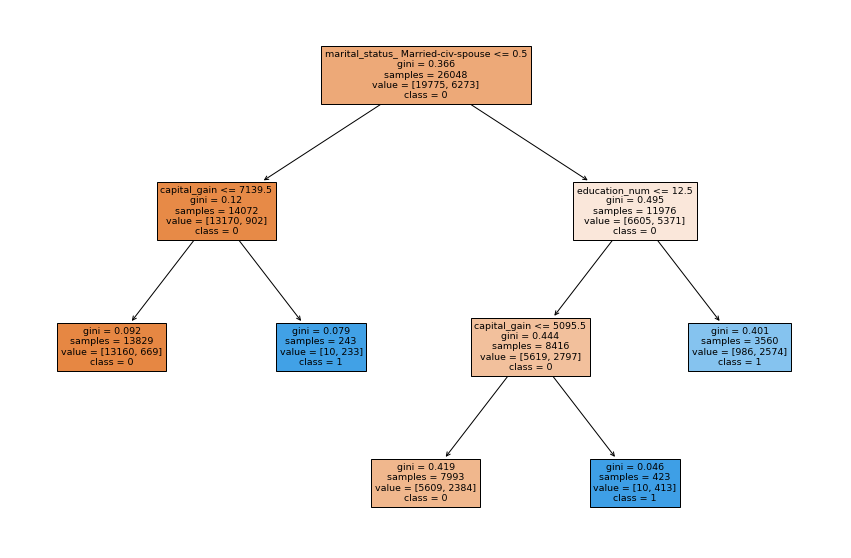

In [42]:
#tree prunning
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("CART accuracy:",metrics.accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

<div style="font-size: 14pt;">Task 2</div>
Train random forest and ensemble models with boosting

In [43]:
#random forest
rf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=30, random_state=200)
rf = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("RF accuracy:",metrics.accuracy_score(y_test, y_pred))

RF accuracy: 0.8458467680024566


In [44]:
#analyze variable importance
sorted_idx = rf.feature_importances_.argsort()
feature_names = earn_d.columns

Text(0.5, 0, 'Random Forest Feature Importance')

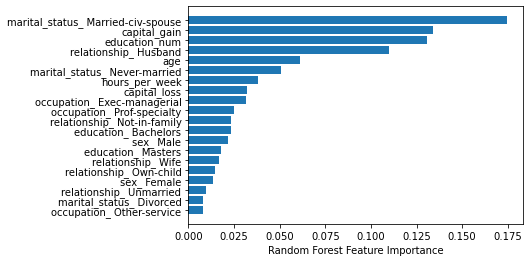

In [45]:
plt.barh(feature_names[sorted_idx][-20:], rf.feature_importances_[sorted_idx][-20:])
plt.xlabel("Random Forest Feature Importance")

In [46]:
#AdaBoost
ab = AdaBoostClassifier(n_estimators=200,random_state=123)
ab = ab.fit(x_train,y_train)
y_pred = ab.predict(x_test)
print("AdaBoost accuracy:",metrics.accuracy_score(y_test, y_pred))

AdaBoost accuracy: 0.8671886995240289


In [47]:
#Gradient boosting
gb = GradientBoostingClassifier(n_estimators=200,random_state=0)
gb = gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Gradient Boost accuracy:",metrics.accuracy_score(y_test, y_pred))

Gradient Boost accuracy: 0.8701059419622293


In [49]:
#XGBoost
xgb = XGBClassifier(n_estimators=200,random_state=4567)
xgb = xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("XGBoost accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\THINK\Anaconda3\envs\amlclass\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:07:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy: 0.8685705512052817


In [50]:
#LGBM classifier
lgbm = lgb.LGBMClassifier()
lgbm = lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)
print("LGBM accuracy:",metrics.accuracy_score(y_test, y_pred))

LGBM accuracy: 0.8730231844004299


In [51]:
#CatBoost classifier
cb=CatBoostClassifier(iterations=500)
cb = cb.fit(x_train,y_train)
y_pred = cb.predict(x_test)
print("CB accuracy:",metrics.accuracy_score(y_test, y_pred))

Learning rate set to 0.078255
0:	learn: 0.6214809	total: 167ms	remaining: 1m 23s
1:	learn: 0.5601700	total: 173ms	remaining: 43s
2:	learn: 0.5069820	total: 181ms	remaining: 29.9s
3:	learn: 0.4712153	total: 189ms	remaining: 23.5s
4:	learn: 0.4423462	total: 196ms	remaining: 19.4s
5:	learn: 0.4199272	total: 204ms	remaining: 16.8s
6:	learn: 0.4021728	total: 213ms	remaining: 15s
7:	learn: 0.3868952	total: 221ms	remaining: 13.6s
8:	learn: 0.3773911	total: 227ms	remaining: 12.4s
9:	learn: 0.3680737	total: 233ms	remaining: 11.4s
10:	learn: 0.3585204	total: 240ms	remaining: 10.7s
11:	learn: 0.3517222	total: 249ms	remaining: 10.1s
12:	learn: 0.3480695	total: 256ms	remaining: 9.58s
13:	learn: 0.3425477	total: 262ms	remaining: 9.08s
14:	learn: 0.3397206	total: 268ms	remaining: 8.67s
15:	learn: 0.3369523	total: 274ms	remaining: 8.3s
16:	learn: 0.3333293	total: 282ms	remaining: 8s
17:	learn: 0.3299616	total: 288ms	remaining: 7.7s
18:	learn: 0.3282414	total: 293ms	remaining: 7.42s
19:	learn: 0.325701

175:	learn: 0.2654134	total: 1.43s	remaining: 2.62s
176:	learn: 0.2651361	total: 1.43s	remaining: 2.62s
177:	learn: 0.2650743	total: 1.44s	remaining: 2.61s
178:	learn: 0.2649268	total: 1.45s	remaining: 2.6s
179:	learn: 0.2648226	total: 1.46s	remaining: 2.6s
180:	learn: 0.2646526	total: 1.47s	remaining: 2.58s
181:	learn: 0.2644632	total: 1.47s	remaining: 2.58s
182:	learn: 0.2643553	total: 1.48s	remaining: 2.57s
183:	learn: 0.2639279	total: 1.49s	remaining: 2.56s
184:	learn: 0.2638271	total: 1.5s	remaining: 2.55s
185:	learn: 0.2636405	total: 1.51s	remaining: 2.55s
186:	learn: 0.2635752	total: 1.51s	remaining: 2.54s
187:	learn: 0.2634954	total: 1.52s	remaining: 2.53s
188:	learn: 0.2633664	total: 1.53s	remaining: 2.52s
189:	learn: 0.2632159	total: 1.54s	remaining: 2.52s
190:	learn: 0.2631066	total: 1.55s	remaining: 2.5s
191:	learn: 0.2630063	total: 1.55s	remaining: 2.5s
192:	learn: 0.2628824	total: 1.56s	remaining: 2.49s
193:	learn: 0.2628061	total: 1.57s	remaining: 2.48s
194:	learn: 0.262

354:	learn: 0.2481061	total: 2.89s	remaining: 1.18s
355:	learn: 0.2480420	total: 2.9s	remaining: 1.17s
356:	learn: 0.2479921	total: 2.91s	remaining: 1.16s
357:	learn: 0.2479321	total: 2.92s	remaining: 1.16s
358:	learn: 0.2478904	total: 2.92s	remaining: 1.15s
359:	learn: 0.2478044	total: 2.93s	remaining: 1.14s
360:	learn: 0.2477131	total: 2.94s	remaining: 1.13s
361:	learn: 0.2476681	total: 2.94s	remaining: 1.12s
362:	learn: 0.2476273	total: 2.95s	remaining: 1.11s
363:	learn: 0.2475539	total: 2.96s	remaining: 1.1s
364:	learn: 0.2474913	total: 2.96s	remaining: 1.09s
365:	learn: 0.2474310	total: 2.97s	remaining: 1.09s
366:	learn: 0.2473552	total: 2.98s	remaining: 1.08s
367:	learn: 0.2473224	total: 2.98s	remaining: 1.07s
368:	learn: 0.2472877	total: 2.99s	remaining: 1.06s
369:	learn: 0.2472590	total: 3s	remaining: 1.05s
370:	learn: 0.2471657	total: 3s	remaining: 1.04s
371:	learn: 0.2470708	total: 3.01s	remaining: 1.03s
372:	learn: 0.2468969	total: 3.02s	remaining: 1.03s
373:	learn: 0.246805

<div style="font-size: 14pt;">Task 3</div>
Cross-validate classifers

In [52]:
gb = GradientBoostingClassifier(n_estimators=100,random_state=0)
params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3,4,5]
}    

#check documentation 
grid_search = GridSearchCV(estimator=gb,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)
grid_search.best_score_
gb_best = grid_search.best_estimator_
gb_best

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.6min finished


GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=0)

In [53]:
y_pred = gb_best.predict(x_test)
print("CV Gradient Boost accuracy:",metrics.accuracy_score(y_test, y_pred))

CV Gradient Boost accuracy: 0.8727161062490404


In [ ]:
xgb = XGBClassifier(n_estimators=100,random_state=4567)
params = {
    'n_estimators': [50,100,200,300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3,4,5]
}    

#check documentation 
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)
grid_search.best_score_
xgb_best = grid_search.best_estimator_
xgb_best

In [ ]:
y_pred = xgb_best.predict(x_test)
print("XGBoost accuracy:",metrics.accuracy_score(y_test, y_pred))

In [54]:
lgbm = lgb.LGBMClassifier()
params = {
    'n_estimators': [50,100,200,300,400,500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3,4,5]
}    

#check documentation 
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)
grid_search.best_score_
lgbm_best = grid_search.best_estimator_
lgbm_best

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   26.1s finished


LGBMClassifier(max_depth=4, n_estimators=400)

In [55]:
y_pred = lgbm_best.predict(x_test)
print("LGBM accuracy:",metrics.accuracy_score(y_test, y_pred))

LGBM accuracy: 0.8713342545677875


In [56]:
#instead of predicting labels you can predict probabilities and use ROC to fing the best threshold
y_prob = lgbm_best.predict_proba(x_test)

In [57]:
y_prob = [round(x,4) for x in y_prob[:,1]]

In [58]:
print(y_pred[0:20], '\n', y_prob[0:20])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0] 
 [0.595, 0.0001, 0.4198, 0.0097, 0.3042, 0.0735, 0.0001, 0.0502, 0.0099, 0.0243, 0.0947, 0.0002, 0.0035, 0.0147, 0.003, 0.9674, 0.075, 0.4034, 0.5588, 0.0002]
